In [1]:
library(psych)

setwd('/moochie/user_data/CamachoCat/Aggregate_anats/doc/')
data<-read.csv('subject_info_new.csv')
colnames(data)


[1] "freesurferID"            "SequenceVersion"        
 [3] "Age_yrs"                 "male"                   
 [5] "USE"                     "GMD_QC"                 
 [7] "eTIV"                    "activity_level"         
 [9] "anger_frustration"       "approach"               
[11] "attention_focusing"      "discomfort"             
[13] "soothability"            "fear"                   
[15] "high_intensity_pleasure" "impulsivity"            
[17] "inhibitory_control"      "low_intensity_pleasure" 
[19] "perceptual_sensitivity"  "sadness"                
[21] "shyness"                 "smiling_laughter"       
[23] "MAP_Temper_Loss"         "MAP_Noncompliance"      
[25] "MAP_General_Aggression"  "MAP_Low_Concern"        
[27] "factor1"                 "factor2"                
[29] "factor3"                 "factor4"

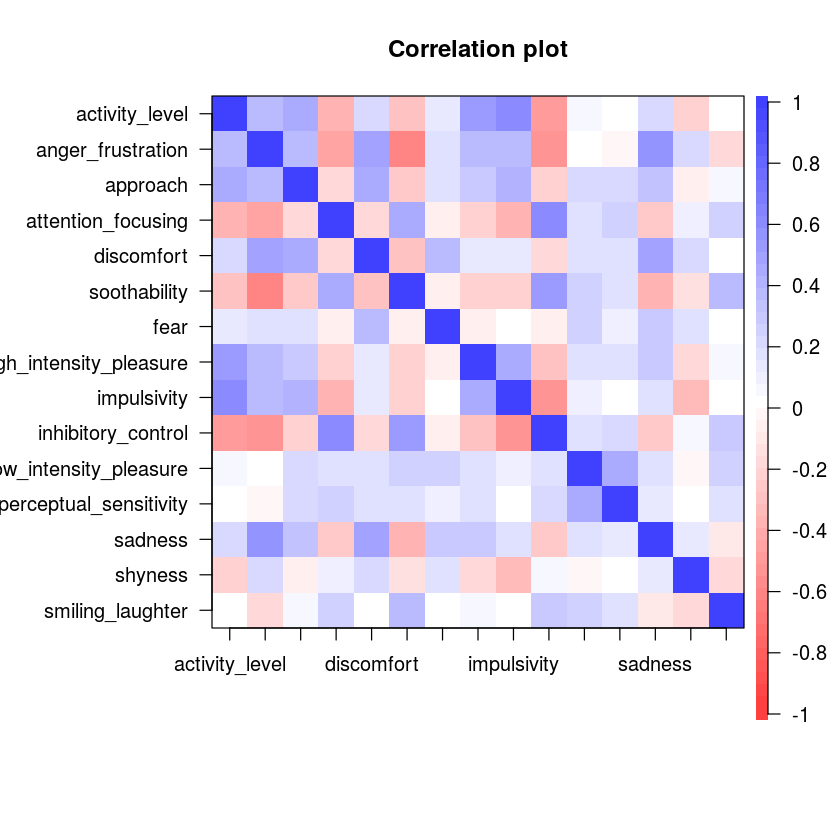

In [2]:
cbq<-cbind(data[,8:22])

cor.plot(cbq)

cor_mtx <-cor(cbq, use = 'complete.obs')

Parallel analysis suggests that the number of factors =  4  and the number of components =  3 


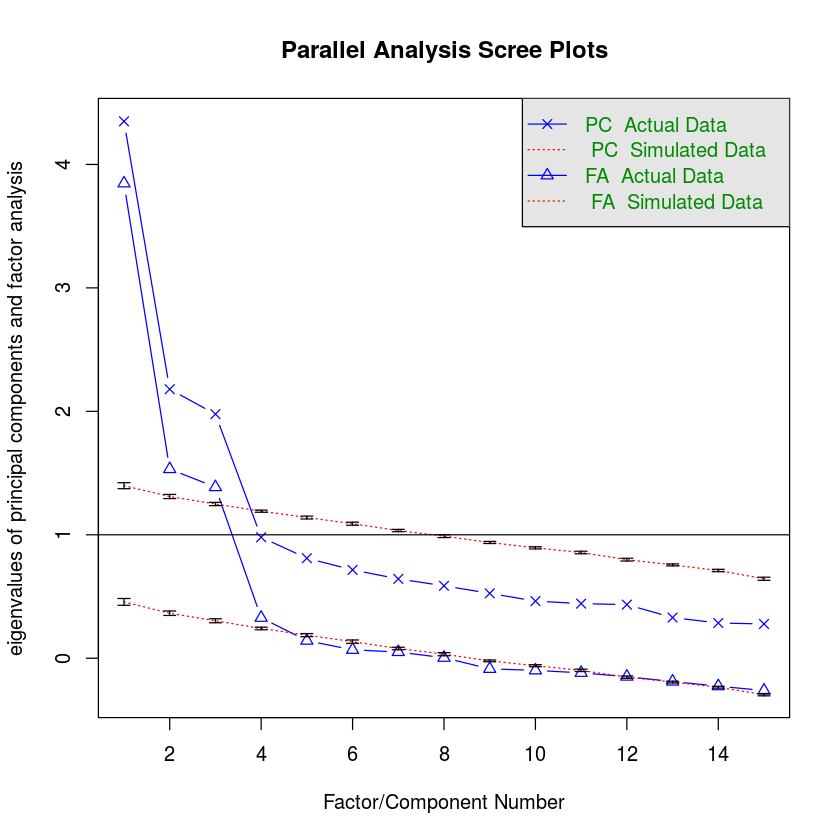

In [3]:
fa.parallel(cor_mtx, fa='both', n.obs=270,fm='ml', SMC=TRUE, error.bars=TRUE,se.bars=TRUE)

In [4]:
model <- fa(cbq,4,fm='ml',rotate='varimax')
model

Factor Analysis using method =  ml
Call: fa(r = cbq, nfactors = 4, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                          ML3   ML2   ML4   ML1   h2    u2 com
activity_level           0.19  0.66 -0.08  0.28 0.56 0.437 1.6
anger_frustration        0.65  0.24 -0.40  0.25 0.70 0.301 2.3
approach                 0.49  0.39  0.14  0.07 0.42 0.578 2.1
attention_focusing      -0.24 -0.43  0.46 -0.08 0.46 0.538 2.6
discomfort               0.71  0.06  0.02  0.04 0.51 0.491 1.0
soothability            -0.45 -0.16  0.57 -0.21 0.60 0.401 2.4
fear                     0.46  0.00  0.12 -0.14 0.24 0.755 1.3
high_intensity_pleasure  0.08  0.38  0.07  0.92 1.00 0.005 1.4
impulsivity              0.12  0.83 -0.04  0.13 0.72 0.280 1.1
inhibitory_control      -0.27 -0.55  0.53 -0.11 0.67 0.328 2.5
low_intensity_pleasure   0.27  0.06  0.60  0.06 0.44 0.559 1.4
perceptual_sensitivity   0.22 -0.02  0.52  0.11 0.33 0.669 1.5
sadness       

In [5]:
scores<-factor.scores(cbq, model)
factor_scores<-scores$scores
data$factor1<-factor_scores[,1]
data$factor2<-factor_scores[,2]
data$factor3<-factor_scores[,3]
data$factor4<-factor_scores[,4]
write.csv(data, 'subject_info_new.csv')